# Aula 06 - Agrupamento Avançado de Dados

## **Resumo**: Exerícios de agrupamento avançado de DataFrames do Pandas.

# I CARREGAMENTO DOS PACOTES NECESSÁRIOS

In [68]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

# II DIRETÓRIOS

In [83]:
os.chdir("G:\\Meu Drive\\Selection\\esm_selection")
root_dir   = Path(os.getcwd())
input_dir  = Path(root_dir, "Data/Input")
output_dir = Path(root_dir, "Data/Output")
figure_dir = Path(root_dir, 'Figures/')
output_dir

WindowsPath('G:/Meu Drive/Selection/esm_selection/Data/Output')

# Exercício 1: Agrupamento Avançado de Dados

In [5]:
# a)
pagamentos = (pd.read_pickle(Path(input_dir, "pagamentos_missings.pickle") )
              .T.drop_duplicates().T
              .dropna(how = 'all', axis = 1)
              .dropna(how = 'all', axis = 0)
              )

pagamentos.head()

,cpf,salario,encargos,custo_mensal,salario_anual,custo_anual
0,908777362057,22771.880859,634.0,23405.880859,273262.5625,280870.5625
1,324268288911,20637.560547,NaN,21175.560547,247650.71875,254106.71875
2,766148980149,27527.339844,NaN,27857.339844,330328.0625,334288.0625
3,575223597306,29147.300781,641.0,29788.300781,349767.625,357459.625
4,900619489281,37617.300781,789.0,38406.300781,451407.625,460875.625


In [49]:
# b)
intervals = np.linspace(pagamentos["salario"].min(),
                        pagamentos["salario"].max(),
                        6
                  )
intervals

array([ 1349.02001953,  9879.33632813, 18409.65263672, 26939.96894531,
       35470.28525391, 44000.6015625 ])

In [50]:
# c)
pagamentos = (pagamentos
              .assign(wage_cat = lambda df: pd.cut(df["salario"], bins = intervals,
                                                   labels =  ["VL", "L", "R", "H", "VH" ]) )
              )
pagamentos

,cpf,salario,encargos,custo_mensal,salario_anual,custo_anual,wage_cat
0,908777362057,22771.880859,634.0,23405.880859,273262.5625,280870.5625,R
1,324268288911,20637.560547,NaN,21175.560547,247650.71875,254106.71875,R
2,766148980149,27527.339844,NaN,27857.339844,330328.0625,334288.0625,H
3,575223597306,29147.300781,641.0,29788.300781,349767.625,357459.625,H
4,900619489281,37617.300781,789.0,38406.300781,451407.625,460875.625,VH
...,...,...,...,...,...,...,...
7958,987599552888,9450.05957,341.0,9791.05957,113400.71875,117492.71875,VL
7959,577833528199,25498.859375,797.0,26295.859375,305986.3125,315550.3125,R
7960,920324446993,14134.419922,808.0,14942.419922,169613.03125,179309.03125,L
7961,631234133516,27519.140625,818.0,28337.140625,330229.6875,340045.6875,H


In [51]:
# d)
pagamentos_aggregated = (pagamentos
                         .groupby(['wage_cat'])
                         [['salario', 'encargos']]
                         .aggregate(["sum", "mean", "median", "std",
                                     ("q_25", lambda x: np.quantile(x, q = 0.25) ),
                                     ("q_75", lambda x: np.quantile(x, q = 0.75) )])
                         )
pagamentos_aggregated

salario                                           \
                      sum          mean        median          std   
wage_cat                                                             
VL         8744813.546631   5652.756009   5661.399902  2529.067490   
L         23407555.988281  14117.946917  14149.390137  2474.786459   
R         35012466.828125  22750.140889  22843.519531  2444.393750   
H         51581651.529297  31318.549805  31343.599609  2493.614641   
VH          62533201.6875  39804.711450  39830.019531  2462.613436   

                                       encargos                     \
                  q_25          q_75        sum        mean median   
wage_cat                                                             
VL         3382.500000   7916.229980  1000525.0  646.751778  645.0   
L         11930.285400  16348.580078  1069249.0  644.902895  640.0   
R         20712.699219  24805.500000  1002476.0  651.804941  656.0   
H         29148.180664  33510.980469  1079467.0  655.812272  657.0   
VH        37766.859375  41978.238281  1010789.0  643.404838  642.0   

                                    
                 std   q_25   q_75  
wage_cat                            
VL        205.441658  466.5  825.5  
L         200.339584  472.0  813.0  
R         200.272416  477.5  820.0  
H         201.797288  483.5  829.5  
VH        200.371582  470.0  815.5

In [98]:
# e)
pagamentos_transformed = (pagamentos
                          .assign(wage_g_mean = lambda df: df.groupby(['wage_cat'])["salario"].transform("mean"),
                                  wage_diff   = lambda df: df["salario"] - df["wage_g_mean"],
                                  wage_g_std= lambda df: df.groupby(['wage_cat'])["salario"].transform("std"),
                                  )
                         )
pagamentos_transformed

,cpf,salario,encargos,custo_mensal,salario_anual,custo_anual,wage_cat,wage_g_mean,wage_diff,wage_g_std
0,908777362057,22771.880859,634.0,23405.880859,273262.5625,280870.5625,R,22750.140889,21.73997,2444.393750
1,324268288911,20637.560547,NaN,21175.560547,247650.71875,254106.71875,R,22750.140889,-2112.580342,2444.393750
2,766148980149,27527.339844,NaN,27857.339844,330328.0625,334288.0625,H,31318.549805,-3791.209962,2493.614641
3,575223597306,29147.300781,641.0,29788.300781,349767.625,357459.625,H,31318.549805,-2171.249024,2493.614641
4,900619489281,37617.300781,789.0,38406.300781,451407.625,460875.625,VH,39804.711450,-2187.410668,2462.613436
...,...,...,...,...,...,...,...,...,...,...
7958,987599552888,9450.05957,341.0,9791.05957,113400.71875,117492.71875,VL,5652.756009,3797.303561,2529.067490
7959,577833528199,25498.859375,797.0,26295.859375,305986.3125,315550.3125,R,22750.140889,2748.718486,2444.393750
7960,920324446993,14134.419922,808.0,14942.419922,169613.03125,179309.03125,L,14117.946917,16.473005,2474.786459
7961,631234133516,27519.140625,818.0,28337.140625,330229.6875,340045.6875,H,31318.549805,-3799.40918,2493.614641


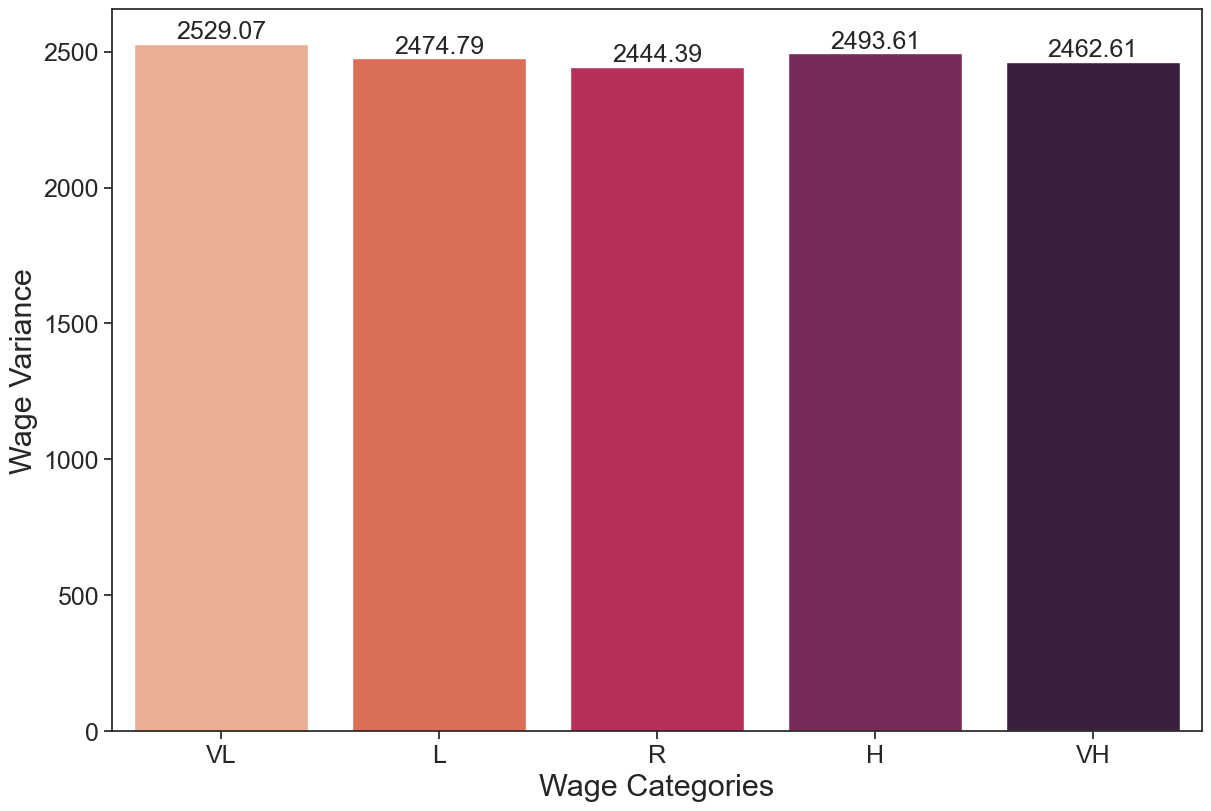

In [101]:
# f)
plt.figure(figsize = (12, 8), layout = 'constrained')
sns.set(style = "ticks")
bar_plot = sns.barplot(data = pagamentos_transformed, x = "wage_cat", y = "wage_g_std",  errwidth = 0, palette = "rocket_r")
bar_plot.bar_label(bar_plot.containers[-1], label_type = 'edge', fontsize = 18)

plt.xlabel("Wage Categories", fontsize = 22)
plt.ylabel("Wage Variance", fontsize = 22)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
bar_plot.get_figure().savefig( Path(figure_dir, 'Bar_Plot' + '.png'), dpi = 400)

plt.show()

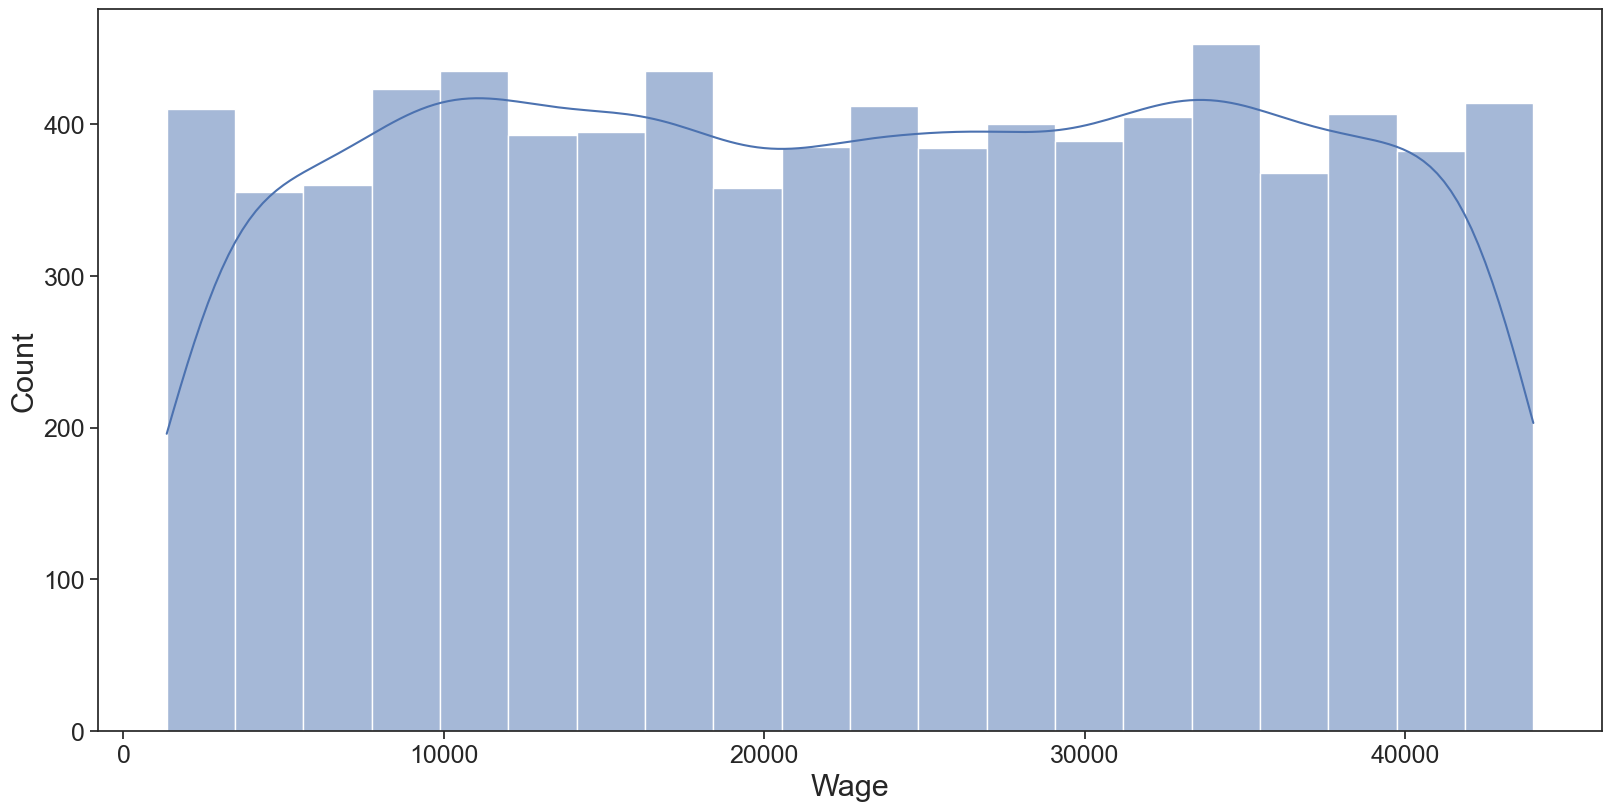

In [92]:
plt.figure(figsize = (16, 8), layout = 'constrained')
sns.set(style = "ticks")
hist_plot = sns.histplot(data = pagamentos_transformed, x = "salario", kde = True)
plt.xlabel("Wage", fontsize = 22)
plt.ylabel("Count", fontsize = 22)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
figure.get_figure().savefig( Path(figure_dir, 'Histogram' + '.png'), dpi = 400)

plt.show()